In [1]:
import gym
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
ENV = gym.make('CartPole-v1')
ENV.reset()

[2017-06-02 10:57:05,825] Making new env: CartPole-v1


array([-0.00679276, -0.00860405,  0.03481377,  0.03815915])

In [4]:
def initialize_random_weights(mean, std):
    return np.random.normal(mean, std, 4)

In [26]:
def sigmoid(weights, observation):
    weighted_sum = sum([weights[i] * observation[i] for i in range(len(weights))])
    return 1.0 / (1 + np.exp(-weighted_sum)) 

def grad_log_sigmoid(weights, observation, action):
    if action == 1:
        return observation * (1 - sigmoid(weights, observation))
    else:
        return - observation * sigmoid(weights, observation)

def get_action(weights, observation):
    prob_one = sigmoid(weights, observation)
    return int(np.random.random() <= prob_one)

In [27]:
def one_cartpole_run(weights):
    observation = ENV.reset()
    cum_reward = 0
    grad_log_sum = np.zeros(4)
    for t in range(1000):
        action = get_action(weights, observation)
        observation, reward, done, info = ENV.step(action)
        cum_reward += reward
        grad_log_sum += grad_log_sigmoid(weights, observation, action)
        if done:
            break
    return cum_reward, grad_log_sum

In [51]:
batch_n = 10 ** 2
grad_sample = 10
weights = initialize_random_weights(0, 1)
learning_rate = 10 ** (-4)
beta = 0.01
current_score = [0] * (batch_n * grad_sample)

for i in range(batch_n):
    
    avg_grad_log_sum = np.zeros(4)
    for k in range(grad_sample):
        cum_reward, grad_log_sum = one_cartpole_run(weights)
        avg_grad_log_sum += grad_log_sum * np.log(np.log(cum_reward))
        current_score[i * grad_sample + k] = cum_reward
    avg_grad_log_sum /= grad_sample
#     avg_grad_log_sum -= beta * weights
#     print np.clip(avg_grad_log_sum, -5, 5), cum_reward
    
    weights += learning_rate * np.clip(avg_grad_log_sum, -0.1, 0.1)

print weights, current_score[-1]

[ 0.43010404 -0.56181723  0.10141048 -0.32882156] 38.0


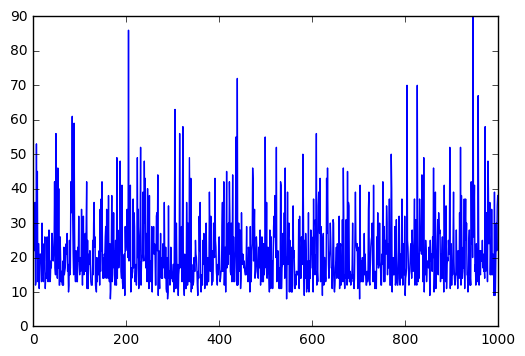

In [52]:
plt.plot(range(len(current_score)), current_score)
plt.show()